In [1]:
import signac
import numpy as np
import matplotlib.pyplot as plt
import cme_lab_utils as cme
from cme_lab_utils import rdf, msd
import gsd 
import gsd.pygsd
import gsd.hoomd

In [2]:
project = signac.get_project('first-run-pekk')

In [ ]:
high_para = project.find_jobs({'para_weight': 1.0})
half_para = project.find_jobs({'para_weight': 0.5})
no_para = project.find_jobs({'para_weight': 0.0})

In [ ]:
fig = plt.figure()
for key, job in high_para.groupby('kT_quench'):
    job = list(job)[0]
    data = np.genfromtxt(job.fn('sim_traj.log'), names=True, delimiter='\t')
    f = gsd.pygsd.GSDFile(open(job.fn('sim_traj.gsd'), "rb"))
    t = gsd.hoomd.HOOMDTrajectory(f)
    num_particles = t[0].particles.N
    f.close()
    plt.plot(data['potential_energy'][100:]/num_particles)
    plt.xlabel('<PE>')
    plt.ylabel('Time Step')
    plt.title('100% Para')

In [ ]:
fig = plt.figure()
for key, job in half_para.groupby('kT_quench'):
    job = list(job)[0]
    data = np.genfromtxt(job.fn('sim_traj.log'), names=True, delimiter='\t')
    f = gsd.pygsd.GSDFile(open(job.fn('sim_traj.gsd'), "rb"))
    t = gsd.hoomd.HOOMDTrajectory(f)
    num_particles = t[0].particles.N
    f.close()
    plt.plot(data['potential_energy'][100:]/num_particles)
    plt.xlabel('<PE>')
    plt.ylabel('Time Step')
    plt.title('50% Para - 50% Meta')

In [ ]:
fig = plt.figure()
for key, job in no_para.groupby('kT_quench'):
    job = list(job)[0]
    data = np.genfromtxt(job.fn('sim_traj.log'), names=True, delimiter='\t')
    f = gsd.pygsd.GSDFile(open(job.fn('sim_traj.gsd'), "rb"))
    t = gsd.hoomd.HOOMDTrajectory(f)
    num_particles = t[0].particles.N
    f.close()
    plt.plot(data['potential_energy'][100:]/num_particles)
    plt.xlabel('<PE>')
    plt.ylabel('Time Step')
    plt.title('100% Meta')

In [ ]:
temp = 1.2
fig = plt.figure()
ax = plt.subplot(111)
for key, job in project.groupby('para_weight'):
    for j in list(job):
        if j.sp['kT_quench'] == temp:
            data = np.genfromtxt(j.fn('sim_traj.log'),
                                names=True, delimiter='\t')
            f = gsd.pygsd.GSDFile(open(j.fn('sim_traj.gsd'), "rb"))
            t = gsd.hoomd.HOOMDTrajectory(f)
            num_particles = t[0].particles.N
            f.close()
            pe = data['potential_energy'][-1000:]
            ax.plot(pe / num_particles, label=j.sp['para_weight'])
plt.title('Temperature of {}kT'.format(temp))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='Para Weight')

plt.ylabel('<PE>')
plt.show()
    

In [ ]:
print(((8.24 - 8.22) / 8.22)*100)

In [ ]:
temp = 1.2
fig = plt.figure()
ax = plt.subplot(111)
for key, job in project.groupby('para_weight'):
    for j in list(job):
        if j.sp['kT_quench'] == temp:
            data = np.genfromtxt(j.fn('sim_traj.log'),
                                names=True, delimiter='\t')
            f = gsd.pygsd.GSDFile(open(j.fn('sim_traj.gsd'), "rb"))
            t = gsd.hoomd.HOOMDTrajectory(f)
            num_particles = t[0].particles.N
            f.close()
            pe = data['kinetic_energy'][-1000:]
            ax.plot(pe / num_particles, label=j.sp['para_weight'])
plt.title('Temperature of {}kT'.format(temp))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='Para Weight')

plt.ylabel('<KE>')
plt.show()

In [ ]:
temp = 1.4
fig = plt.figure()
ax = plt.subplot(111)
for key, job in project.groupby('para_weight'):
    for j in list(job):
        if j.sp['kT_quench'] == temp:
            gsd = j.fn('sim_traj.gsd')
            job_rdf = rdf.gsd_rdf(gsd, A_name='ca', B_name='ca', rmax=4, start=-10, stop=-1)
            ax.plot(job_rdf.bin_centers, job_rdf.rdf, label=j.sp['para_weight'])
plt.title('Temperature of {}kT'.format(temp))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='Para Weight')
plt.ylabel('g(r)')
plt.show()

In [ ]:
temp = 1.4
fig = plt.figure()
ax = plt.subplot(111)
for key, job in project.groupby('para_weight'):
    for j in list(job):
        if j.sp['kT_quench'] == temp:
            gsd = j.fn('sim_traj.gsd')
            job_msd = msd.msd_from_gsd(gsd, start=-10, stop=-1, atom_type='ca')
            ax.plot(job_msd, label=j.sp['para_weight'])
plt.title('Temperature of {}kT'.format(temp))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='Para Weight')
plt.ylabel('MSD')
plt.show()

In [ ]:
print(project.detect_schema())

## Check MSD and RDF at different densities

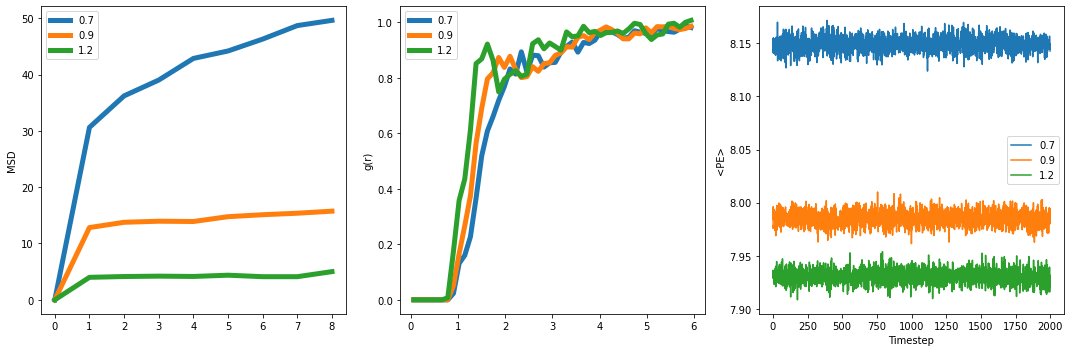

In [37]:
temp = 1
para_weight = 0.5

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

jobs = project.find_jobs(filter={'kT_quench': temp, 'para_weight': para_weight})
for key, job in jobs.groupby('density'):
    j = list(job)[0]

    gsd_file = j.fn('sim_traj.gsd')
    job_msd = msd.msd_from_gsd(gsd_file, start=-10, stop=-1, atom_type='ca')
    ax1.plot(job_msd, label=j.sp['density'], linewidth=5)
    
    job_rdf = rdf.gsd_rdf(gsd_file, A_name='os', B_name='os', rmax=6, start=-10, stop=-1)
    ax2.plot(job_rdf.bin_centers, job_rdf.rdf, label=j.sp['density'], linewidth=5)
    
    data = np.genfromtxt(j.fn('sim_traj.log'),
                        names=True, delimiter='\t')
    f = gsd.pygsd.GSDFile(open(j.fn('sim_traj.gsd'), "rb"))
    t = gsd.hoomd.HOOMDTrajectory(f)
    num_particles = t[0].particles.N
    f.close()    
    pe = data['potential_energy'][-2000:]
    ax3.plot(pe / num_particles, label=j.sp['density'])

#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#          fontsize=12, title='Density')

ax1.set_ylabel('MSD')
#ax1.set_xlabel('Timestep')
ax1.legend()

ax2.set_ylabel('g(r)')
#ax2.set_xlabel('Timestep')
ax2.legend()

ax3.set_ylabel('<PE>')
ax3.set_xlabel('Timestep')
ax3.legend()

plt.tight_layout() 
plt.show()

## Check MSD and RDF at different Para weights

No handles with labels found to put in legend.


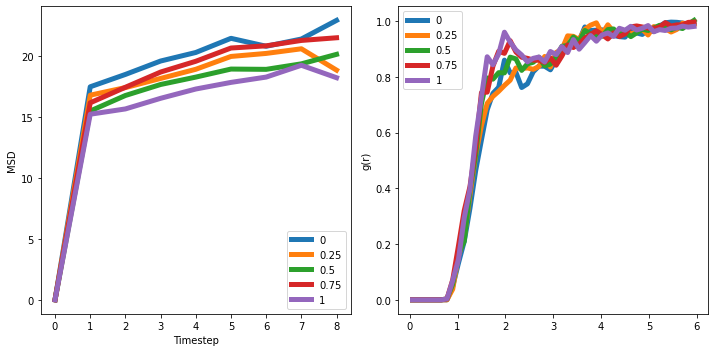

In [43]:
temp = 1.3
density = 0.9

msd_plot=True
rdf_plot = True
pe_plot = False

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

if msd_plot:
    ax1 = fig.add_subplot(131)
    
if rdf_plot:
    ax2 = fig.add_subplot(132)
if pe_plot:
    ax3 = fig.add_subplot(133)

jobs = project.find_jobs(filter={'kT_quench': temp, 'density': density})
for key, job in jobs.groupby('para_weight'):
    j = list(job)[0]
    
    if msd_plot:
        gsd_file = j.fn('sim_traj.gsd')
        job_msd = msd.msd_from_gsd(gsd_file, start=-10, stop=-1, atom_type='ca')
        ax1.plot(job_msd, label=j.sp['para_weight'], linewidth=5)
    
    if rdf_plot:
        job_rdf = rdf.gsd_rdf(gsd_file, A_name='os', B_name='os', rmax=6, start=-10, stop=-1)
        ax2.plot(job_rdf.bin_centers, job_rdf.rdf, label=j.sp['para_weight'], linewidth=5)
    
    if pe_plot:
        data = np.genfromtxt(j.fn('sim_traj.log'),
                            names=True, delimiter='\t')
        f = gsd.pygsd.GSDFile(open(j.fn('sim_traj.gsd'), "rb"))
        t = gsd.hoomd.HOOMDTrajectory(f)
        num_particles = t[0].particles.N
        f.close()    
        pe = data['potential_energy'][100:]
        ax3.plot(pe / num_particles, label=j.sp['para_weight'])

#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#          fontsize=12, title='Density')

if ax1:
    ax1.set_ylabel('MSD')
    ax1.set_xlabel('Timestep')
    ax1.legend()
if ax2:
    ax2.set_ylabel('g(r)')
    #ax2.set_xlabel('Timestep')
    ax2.legend()
if ax3:
    ax3.set_ylabel('<PE>')
    ax3.set_xlabel('Timestep')
    ax3.legend()

plt.tight_layout() 
plt.show()

In [ ]:
# para vs meta and melting temp PEKK


## Check MSD and RDF at different temps

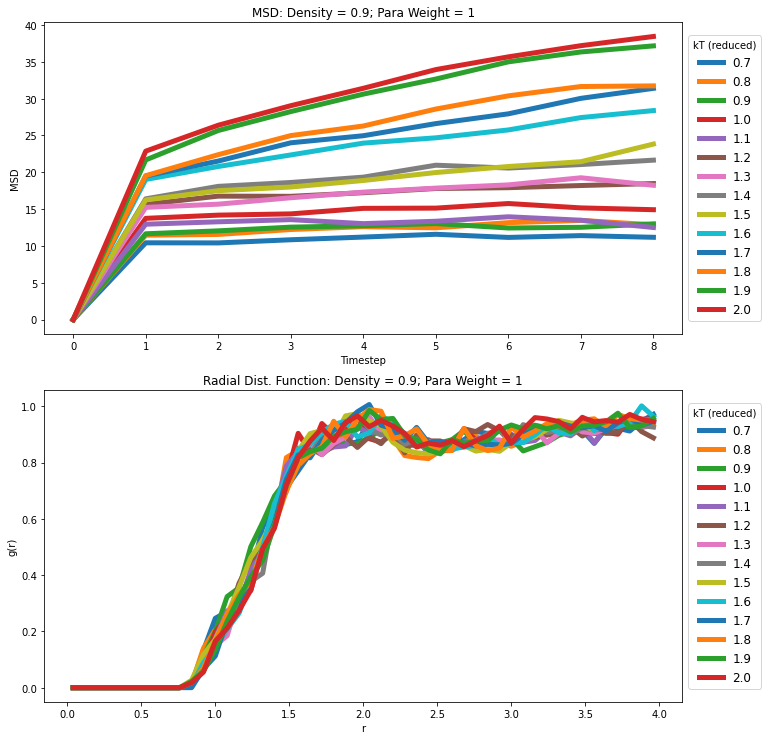

In [73]:
para_weight = 1
density = 0.9

msd_plot=True
rdf_plot = True
pe_plot = False

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)

ax1 = None
ax2 = None
ax3 = None

if msd_plot:
    ax1 = fig.add_subplot(311)
if rdf_plot:
    ax2 = fig.add_subplot(312)
if pe_plot:
    ax3 = fig.add_subplot(313)

jobs = project.find_jobs(filter={'para_weight': para_weight, 'density': density})
for key, job in jobs.groupby('kT_quench'):
    j = list(job)[0]

    if msd_plot:
        gsd_file = j.fn('sim_traj.gsd')
        job_msd = msd.msd_from_gsd(gsd_file, start=-10, stop=-1, atom_type='ca')
        ax1.plot(job_msd, label=j.sp['kT_quench'], linewidth=5)
    
    if rdf_plot:
        job_rdf = rdf.gsd_rdf(gsd_file, A_name='os', B_name='os', rmax=4, start=-10, stop=-1)
        ax2.plot(job_rdf.bin_centers, job_rdf.rdf, label=j.sp['kT_quench'], linewidth=5)

    if pe_plot:
        data = np.genfromtxt(j.fn('sim_traj.log'),
                            names=True, delimiter='\t')
        f = gsd.pygsd.GSDFile(open(j.fn('sim_traj.gsd'), "rb"))
        t = gsd.hoomd.HOOMDTrajectory(f)
        num_particles = t[0].particles.N
        f.close()    
        pe = data['potential_energy'][100:]
        ax3.plot(pe / num_particles, label=j.sp['kT_quench'])

#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#          fontsize=12, title='Density')

if ax1:
    ax1.title.set_text('MSD: Density = {}; Para Weight = {}'.format(density, para_weight))
    ax1.set_ylabel('MSD')
    ax1.set_xlabel('Timestep')
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              fontsize=12, title='kT (reduced)')

if ax2:
    ax2.title.set_text('Radial Dist. Function: Density = {}; Para Weight = {}'.format(density, para_weight))
    ax2.set_ylabel('g(r)')
    ax2.set_xlabel('r')
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              fontsize=12, title='kT (reduced)')
if ax3:
    ax3.title.set_text('Potential Energy: Density = {}; Para Weight = {}'.format(density, para_weight))
    ax3.set_ylabel('<PE>')
    ax3.set_xlabel('Timestep')
    box = ax3.get_position()
    ax3.set_position([box.x0, box.y0, box.width*0.90, box.height*0.90])
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              fontsize=12, title='kT (reduced)')

plt.tight_layout() 
plt.show()